In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
# Merge datasets on CustomerID
data = pd.merge(customers, transactions, on="CustomerID")

In [4]:
# Preprocess Data
data.drop(columns=["CustomerID", "SignupDate", "TransactionDate"], inplace=True)  # Drop unnecessary columns
data.fillna(0, inplace=True)  # Handle missing values

In [5]:
# Encode categorical variables
for col in data.select_dtypes(include="object").columns:
    data[col] = LabelEncoder().fit_transform(data[col])

In [6]:
# Scale numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Perform KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose 4 clusters (you can tune this)
data["Cluster"] = kmeans.fit_predict(scaled_data)

In [8]:
# Evaluate Clustering
db_index = davies_bouldin_score(scaled_data, data["Cluster"])
sil_score = silhouette_score(scaled_data, data["Cluster"])

In [9]:
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {sil_score}")

Davies-Bouldin Index: 1.9333065937998364
Silhouette Score: 0.15272614292372194


In [10]:
# Visualize Clusters
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
data["PCA1"] = pca_data[:, 0]
data["PCA2"] = pca_data[:, 1]


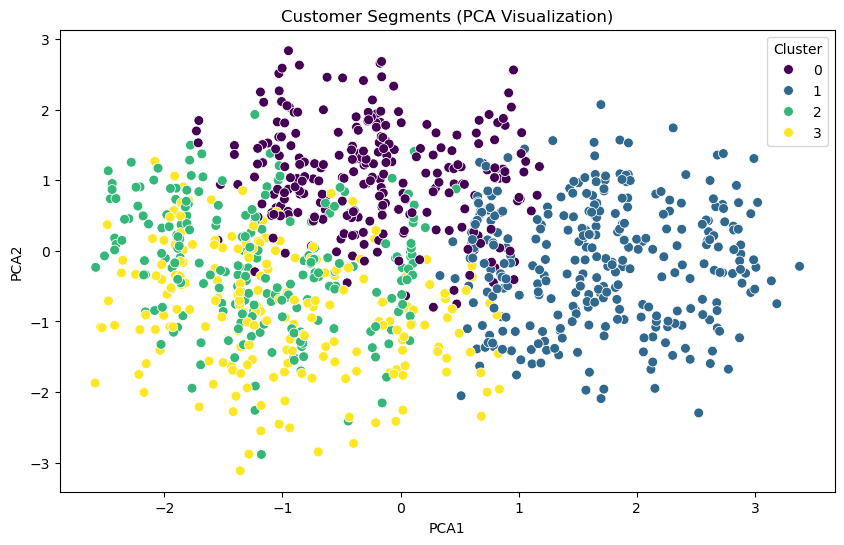

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=data, palette="viridis", s=50)
plt.title("Customer Segments (PCA Visualization)")
plt.show()

In [12]:
# Cluster Insights
cluster_summary = data.groupby("Cluster").mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         CustomerName    Region  TransactionID  ProductID  Quantity  \
Cluster                                                               
0          111.773946  1.896552     508.210728  56.865900  1.482759   
1           99.675325  1.659091     499.441558  52.477273  3.558442   
2           97.396476  2.414097     519.599119  49.801762  2.651982   
3           82.637255  0.392157     466.078431  35.607843  2.215686   

          TotalValue       Price      PCA1      PCA2  
Cluster                                               
0         558.037165  372.907510 -0.202802  1.034992  
1        1310.230195  370.638701  1.684392 -0.165099  
2         289.183921  109.445639 -1.149884 -0.216489  
3         368.393186  177.570245 -1.004106 -0.834016  


In [13]:
# Save clustering results
data.to_csv("Customer_Clusters.csv", index=False)

In [14]:
# Cluster Insights
cluster_summary = data.groupby("Cluster").mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         CustomerName    Region  TransactionID  ProductID  Quantity  \
Cluster                                                               
0          111.773946  1.896552     508.210728  56.865900  1.482759   
1           99.675325  1.659091     499.441558  52.477273  3.558442   
2           97.396476  2.414097     519.599119  49.801762  2.651982   
3           82.637255  0.392157     466.078431  35.607843  2.215686   

          TotalValue       Price      PCA1      PCA2  
Cluster                                               
0         558.037165  372.907510 -0.202802  1.034992  
1        1310.230195  370.638701  1.684392 -0.165099  
2         289.183921  109.445639 -1.149884 -0.216489  
3         368.393186  177.570245 -1.004106 -0.834016  
